## Observations and Insights 

In [ ]:
Conclusions
    

In [ ]:
1-  Tumor Volume decreased with time which shows Drug Regimens are effective
2-  There is only one outliers in 4 of the drug Regimens which shows data is reliable
3-   There was nearly same numbers of males and females which were tested for this experiment

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib notebook


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice.
merge_df["Mouse ID"].count()

1893

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_demographics = merge_df.loc[:, ['Mouse ID','Timepoint']]
mice_df=mice_demographics.drop_duplicates(subset=None, keep='first', inplace=False)
#mice_df


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df=merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()



1888

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
groupby=merge_df.groupby("Drug Regimen")
mean=groupby['Tumor Volume (mm3)'].mean()
median=groupby['Tumor Volume (mm3)'].median()
variance=groupby['Tumor Volume (mm3)'].var()
St_deviation=groupby['Tumor Volume (mm3)'].std()
SEM=groupby['Tumor Volume (mm3)'].sem()

drug_df=pd.DataFrame({"Mean VOl":mean,"Median Volume":median,"Variance":variance,"Standard Deviation":St_deviation,"SEM Vol":SEM})
                 
drug_df.head()


,Mean VOl,Median Volume,Variance,Standard Deviation,SEM Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_df=clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

drug_df=drug_df.rename(columns={"mean":"Mean VOl","median":"Median Volume","var":"Variance","std":"Standard Deviation","sem":"SEM Vol"})

drug_df.head()


,Mean VOl,Median Volume,Variance,Standard Deviation,SEM Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<IPython.core.display.Javascript object>


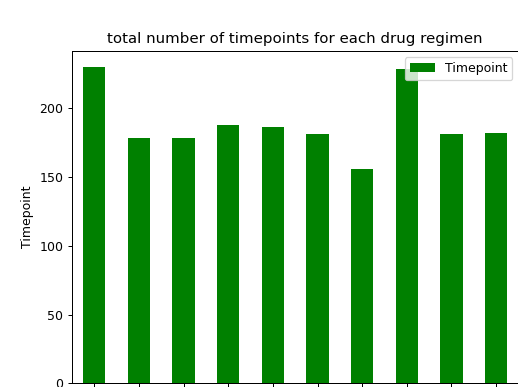

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timep_pd=pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index()
timep1_df=timep_pd[["Drug Regimen","Timepoint"]]
timep1_df=timep1_df.set_index("Drug Regimen")
timep1_df.plot(kind="bar",facecolor="g", alpha=1, align="center")
plt.title("total number of timepoints for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.legend(loc="upper right")
plt.show()

<IPython.core.display.Javascript object>


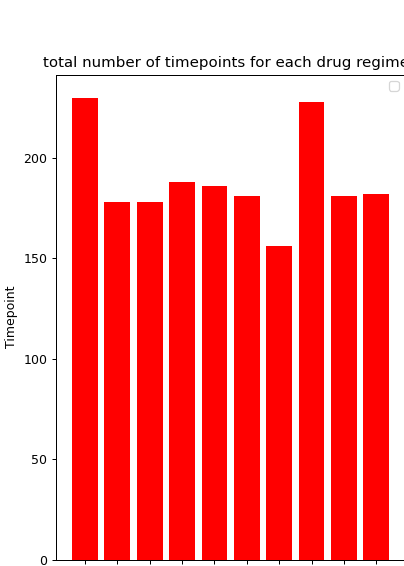

No handles with labels found to put in legend.


<BarContainer object of 10 artists>

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(5,7))
x_axis=clean_df["Drug Regimen"].unique()
y_axis=timep1_df["Timepoint"]
plt.title("total number of timepoints for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
labals=y_axis
plt.legend(loc="best")

plt.bar(x_axis, y_axis,color="r")

<IPython.core.display.Javascript object>


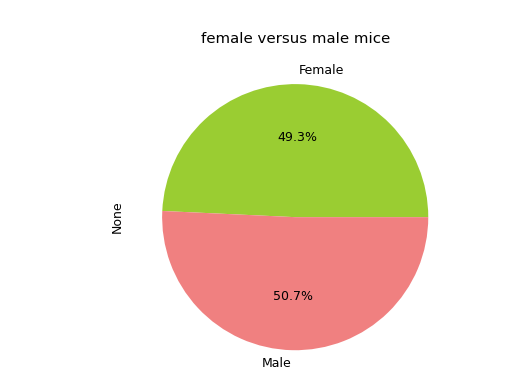

<function matplotlib.pyplot.show(block=None)>

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

tip_df=clean_df.groupby(['Sex']).size()
colors = ["yellowgreen", "lightcoral"]
explode = (0, 0.05, 0, 0)
plt.title("female versus male mice")

tip_df.plot(kind="pie",colors=colors, autopct="%1.1f%%")


plt.show

<IPython.core.display.Javascript object>


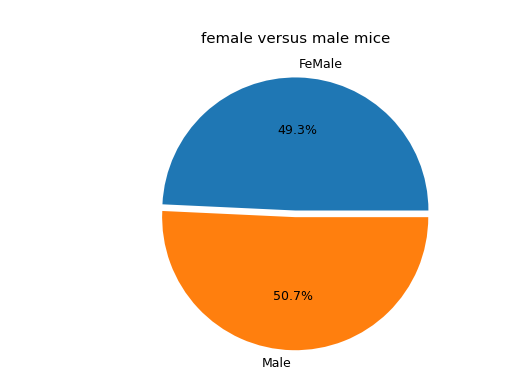

<function matplotlib.pyplot.show(block=None)>

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["FeMale","Male"]
colors = ["yellowgreen", "lightcoral"]
explode = (0.05, 0)
plt.title("female versus male mice")

axis=tip_df
plt.pie(axis,autopct="%1.1f%%",labels=labels, explode=explode)
plt.show

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_df =clean_df.drop_duplicates(subset=['Mouse ID'],keep = 'last')
final_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drugRegimen in treatment:
    loop_df=final_df.loc[final_df["Drug Regimen"]==drugRegimen]
    tumor_vol_final=loop_df["Tumor Volume (mm3)"]
    tumor_volume.append(tumor_vol_final)
    
    # add subset 
#find IQR for Capomulin  
cap_q = tumor_volume[0].quantile([.25,.5,.75])
lowerq_c = cap_q[0.25]
upperq_c = cap_q[0.75]
iqr_c = upperq_c-lowerq_c
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq_c - (1.5*iqr_c)
upper_bound = upperq_c + (1.5*iqr_c)
print(f"Values below {lower_bound} could be outliers for Capomulin volume.")
print(f"Values above {upper_bound} could be outliers for Capomulin volume.")
#find IQR for Ramicane  
ram_q = tumor_volume[1].quantile([.25,.5,.75])
lowerq_r = ram_q[0.25]
upperq_r = ram_q[0.75]
iqr_r = upperq_r-lowerq_r
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq_r- (1.5*iqr_r)
upper_bound = upperq_r + (1.5*iqr_r)
print(f"Values below {lower_bound} could be outliers for Ramicane volume.")
print(f"Values above {upper_bound} could be outliers for Ramicane volume.")
#find IQR for Infubinol  
inf_q = tumor_volume[2].quantile([.25,.5,.75])
lowerq_i = inf_q[0.25]
upperq_i = inf_q[0.75]
iqr_i = upperq_i-lowerq_i
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq_i- (1.5*iqr_i)
upper_bound = upperq_i + (1.5*iqr_i)
print(f"Values below {lower_bound} could be outliers for Infubinol volume.")
print(f"Values above {upper_bound} could be outliers for Infubinol volume.")
#find IQR for Ceftamin  
cft_q = tumor_volume[3].quantile([.25,.5,.75])
lowerq_cft = cft_q[0.25]
upperq_cft = cft_q[0.75] 
iqr_cft= upperq_cft-lowerq_cft
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq_cft- (1.5*iqr_cft)
upper_bound = upperq_cft + (1.5*iqr_cft)
print(f"Values below {lower_bound} could be outliers for Ceftamin volume.")
print(f"Values above {upper_bound} could be outliers for Ceftamin volume.")



Values below 20.70456164999999 could be outliers for Capomulin volume.
Values above 51.83201549 could be outliers for Capomulin volume.
Values below 17.912664470000003 could be outliers for Ramicane volume.
Values above 54.30681135 could be outliers for Ramicane volume.
Values below 36.83290494999999 could be outliers for Infubinol volume.
Values above 82.74144559000001 could be outliers for Infubinol volume.
Values below 25.355449580000002 could be outliers for Ceftamin volume.
Values above 87.66645829999999 could be outliers for Ceftamin volume.


<IPython.core.display.Javascript object>


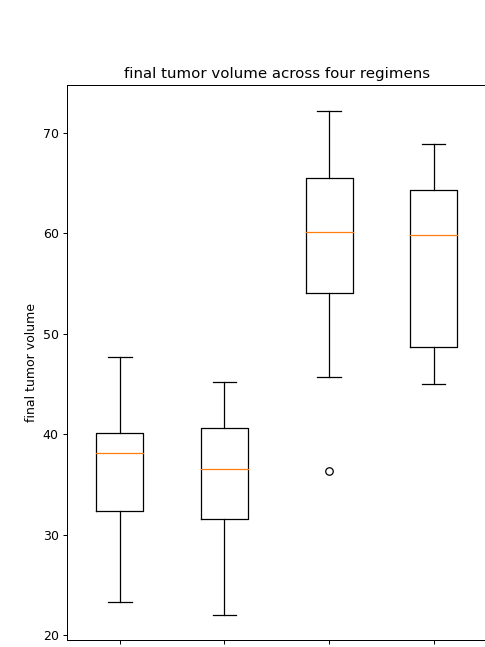

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

plt.figure(figsize=(6,8))
plt.boxplot(tumor_volume, labels=treatment)
plt.title('final tumor volume across four regimens')
plt.ylabel('final tumor volume')
plt.xlabel("Drug Regimen")
plt.show()


## Line and Scatter Plots

In [39]:
capo_df = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')]

capo_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


<IPython.core.display.Javascript object>


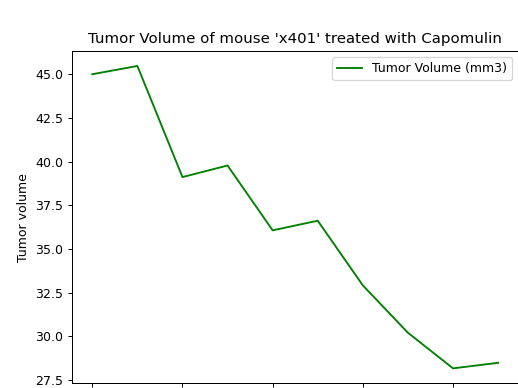

Text(0, 0.5, 'Tumor volume')

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capom_df = capo_df.loc[(capo_df['Mouse ID']=='x401')]
mouse_df = capom_df.loc[(capo_df['Mouse ID']=='x401')]
mouse_df.plot('Timepoint','Tumor Volume (mm3)',color= 'g')

plt.title("Tumor Volume of mouse 'x401' treated with Capomulin")

plt.ylabel("Tumor volume")


In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#capomu_df = clean_df.loc[(clean_df['Mouse ID'])]
capo_df = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')]

weight_groupby=capo_df.groupby("Weight (g)")
ave_pd=pd.DataFrame(weight_groupby["Tumor Volume (mm3)"].mean())
ave_pd=ave_pd.reset_index()
x_axis=ave_pd["Weight (g)"]
y_axis=ave_pd["Tumor Volume (mm3)"]
#plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis)
plt.xlabel("Mouse Weight")
plt.ylabel("ave Tumor Vol")

plt.tight_layout()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [37]:
corr, _ = st.pearsonr(ave_pd["Weight (g)"],ave_pd["Tumor Volume (mm3)"])

print(f"The correlation coefficient between Weight and Average Tumor Volume is {round(corr, 2)}")

The correlation coefficient between Weight and Average Tumor Volume is 0.95


In [38]:
ave_pd_slope, ave_pd_int, ave_pd_r, ave_pd_p, ave_pd_std_err = st.linregress(x_axis,y_axis)
ave_pd_fit =ave_pd_slope * x_axis + ave_pd_int
plt.plot(x_axis,ave_pd_fit)